# GEDI_L4B Search and Visualize


In this example, we demonstrate how to access GEDI L4B granule data on the MAAP ADE.

Within your Jupyter Notebook, start by importing the **maap package**. Then invoke the **MAAP** constructor, setting the maap_host argument to **'api.maap-project.org'**.

In [1]:
from maap.maap import MAAP
from matplotlib import pyplot
import os
import pprint
import rasterio

maap = MAAP(maap_host="api.maap-project.org")

## Search all collections to find the GEDI collection

Then search granules by the GEDI collection's collection ID.

In [2]:
collection = maap.searchCollection(cmr_host='cmr.earthdata.nasa.gov', short_name="GEDI_L4B_Gridded_Biomass_2017", limit=100)
print(collection)

[{'concept-id': 'C2244602422-ORNL_CLOUD', 'revision-id': '7', 'format': 'application/echo10+xml', 'Collection': {'ShortName': 'GEDI_L4B_Gridded_Biomass_2017', 'VersionId': '2', 'InsertTime': '2022-03-29T00:00:00Z', 'LastUpdate': '2023-06-12T20:25:17Z', 'LongName': 'GEDI L4B Gridded Aboveground Biomass Density, Version 2', 'DataSetId': 'GEDI L4B Gridded Aboveground Biomass Density, Version 2', 'Description': "This Global Ecosystem Dynamics Investigation (GEDI) L4B product provides 1 km x 1 km (1 km,  hereafter) estimates of mean aboveground biomass density (AGBD) based on observations from mission week 19 starting on 2019-04-18 to mission week 138 ending on 2021-08-04. The GEDI L4A Footprint Biomass product converts each high-quality waveform to an AGBD prediction, and the L4B product uses the sample present within the borders of each 1 km cell to statistically infer mean AGBD. The gridding procedure is described in the GEDI L4B Algorithm Theoretical Basis Document (ATBD). Patterson et 

### Search for granules using **searchGranule** function with the GEDI collection ID.

In [3]:
COLLECTIONID = collection[0]['concept-id']
results = maap.searchGranule(cmr_host='cmr.earthdata.nasa.gov',concept_id=COLLECTIONID,limit=50)  # COLLECTIONID 'C2244602422-ORNL_CLOUD'
print(f'Got {len(results)} results')
results[0]['Granule']

Got 10 results


{'GranuleUR': 'GEDI_L4B_Gridded_Biomass.GEDI04_B_MW019MW138_02_002_05_R01000M_PS.tif',
 'InsertTime': '2022-03-29T00:00:00Z',
 'LastUpdate': '2023-04-10T21:58:24Z',
 'Collection': {'ShortName': 'GEDI_L4B_Gridded_Biomass_2017',
  'VersionId': '2'},
 'DataGranule': {'DataGranuleSizeInBytes': '20103343',
  'SizeMBDataGranule': '20.103343',
  'Checksum': {'Value': '025a141348906d5e612262218c496a2d468446ca30875439be6651d851bfbe23',
   'Algorithm': 'SHA-256'},
  'DayNightFlag': 'BOTH',
  'ProductionDateTime': '2022-03-29T00:00:00Z'},
 'Temporal': {'RangeDateTime': {'BeginningDateTime': '2019-04-18T00:00:00Z',
   'EndingDateTime': '2021-08-04T23:59:59Z'}},
 'Spatial': {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangle': {'WestBoundingCoordinate': '-180',
     'NorthBoundingCoordinate': '52',
     'EastBoundingCoordinate': '180',
     'SouthBoundingCoordinate': '-52'}}}},
 'MeasuredParameters': {'MeasuredParameter': [{'ParameterName': 'LIDAR WAVEFORM'},
   {'ParameterName': 'BIOMASS'

## Utilize 'getData' function to download one granule's data file

In [4]:
download_path = './download/gedi_l4b'
os.makedirs(download_path, exist_ok=True)
download = results[0].getData(download_path)
# Print the downloaded file
download

'./download/gedi_l4b/GEDI04_B_MW019MW138_02_002_05_R01000M_PS.tif'

In [5]:
src = rasterio.open(download)
data = src.read(1)

# Print the shape of data to verify if rasterio was able to read the file properly
print(data.shape) 

(14616, 34704)


## Plot the .tif file using 'matplotlib'

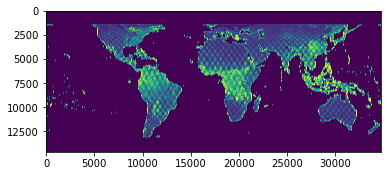

In [6]:
pyplot.imshow(data)
pyplot.show()